# Classification task using a perceptron

Create a dataset with three classes, each class has N objects, represented by two variables X1 and X2 according to the following requirements:

+ N is equal to 100
+ X1 is distributed:
    1. for class 1, a normal distribution with mean -1 and standard deviation 0.5
    2. for class 2, a normal distribution with mean 2.5 and standard deviation 1
    3. for class 3, a normal distribution with mean 4 and standard deviation 1
+ X2 is distributed:
    1. for class 1, an exponential distribution with scale parameter 3
    2. for class 2, a lognormal distribution with mean 0.5 and standard deviation 0.5
    3. for class 3, a Poisson distribution with lambda 2.0 plus a constant equal to 5

Each object has a label y attached (1, 2, or 3).

In [116]:
import numpy as np

np.random.seed(123)

# generate N points per class
N = 100

X1_1 = np.random.normal(loc = -1, scale = 0.5, size = N)
X1_2 = np.random.normal(loc = 2.5, scale = 1, size = N)
X1_3 = np.random.normal(loc = 4, scale = 1, size = N)

X2_1 = np.random.exponential(scale = 3, size = N)
X2_2 = np.random.lognormal(mean = 0.5, sigma = 0.5, size = N)
X2_3 = np.random.poisson(lam = 2.0, size = N) + 5

y1 = np.ones(N)
y2 = 2*np.ones(N)
y3 = 3*np.ones(N)

## Plot the points

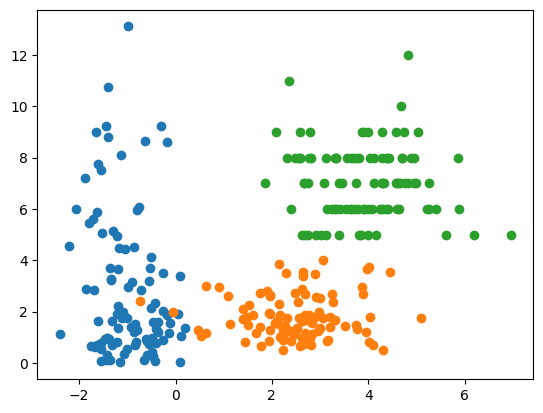

In [117]:
import matplotlib.pyplot as plt

plt.scatter(X1_1, X2_1)
plt.scatter(X1_2, X2_2)
plt.scatter(X1_3, X2_3)

## Create data matrix

Create a matrix of points X (each row is an object) and a vector y of labels. Remember that we need the coordinate X0 for the bias term (all ones).

In [118]:
X = np.stack((np.ones(N * 3),
              np.concatenate((X1_1, X1_2, X1_3)), 
              np.concatenate((X2_1, X2_2, X2_3))), 
             axis = 1)

y = np.concatenate((y1, y2, y3))

In [119]:
X.shape

(300, 3)

## Choose category 

We want to train a binary classifier for class 3. To this purpose, create a vector of labels y_class that contains 1 for each object belonging to the class under study (positive class) and -1 to all the other objects.


In [120]:
positive_class = 2

y_class = -np.ones(y.shape[0])

y_class[y == positive_class] = 1

### Plot this binary problem

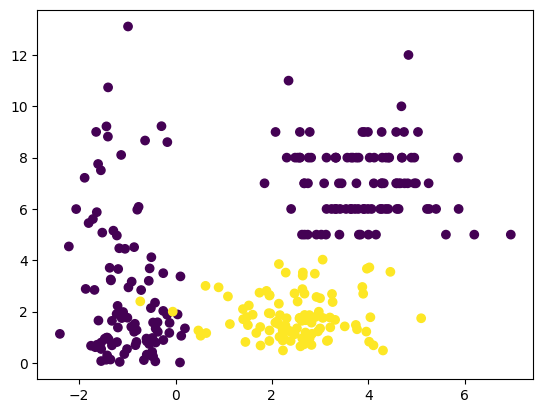

In [121]:
plt.scatter(X[:, 1], X[:, 2], c = y_class)

## Define the Sum of squares error function

Write the function sse(X, y, w) that takes the data matrix X, the labels y, and the vector of paraterers w and computes the error in terms of sum of squares.

In [122]:
def sse(X, y, w):
    error = np.sum(np.square(y - np.dot(X, w)))
    return error


## Train the perceptron with a mini-batch stochastic gradient descent

Set the values of the vector of parameters w with values drawn from a uniform distribution within the range \[-1. 1\].
Use a learning parameter eta equal to 1e-5 and a batch size of 10 objects. Set the maximum number of epochs to 100.
Save in the vector sse_epoch, the values of the sum of squares error for each epoch. Save in the vector errors_epoch, the number of objects misclassified at each epoch.
Remember to shuffle the dataset at each epoch.

# of errors =  23.0


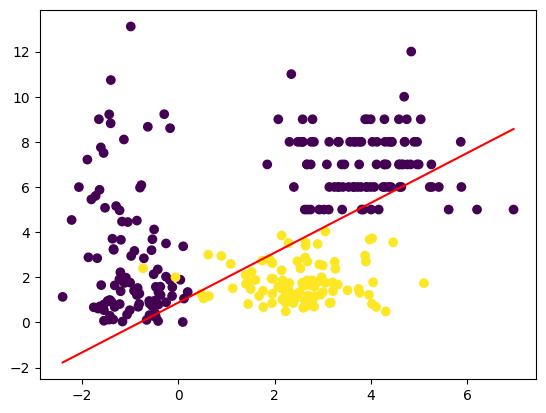

In [123]:
# generate w_0,....,w_n
w = np.random.uniform(low = -1, high = 1, size = 3)

# plot inizial weight vector
#plt.plot([np.min(X[:, 1]), np.max(X[:, 1])], [np.min(X[:, 1]) * (-w[1]/w[2]) - w[0]/w[2], np.max(X[:, 1]) * (-w[1]/w[2]) - w[0]/w[2]])

#X = np.hstack((X0, np.vstack((X1, X2))))
plt.scatter(X[:, 1], X[:, 2], c=y_class)

# set learning rate 0 < eta <= 1
eta = 1e-3

# set mini batch size
batch_size = 5

# set max epochs
max_epochs = 100

# track total error per epoch
sse_epoch = np.zeros(max_epochs + 1)

# set checkpoint
errors_epoch = np.zeros(max_epochs + 1)

for epochs in range(max_epochs):
    
    # compute error
    sse_epoch[epochs] = sse(X, y, w)
    errors_epoch[epochs] = sum((y_class * np.sign(np.dot(X, w))) < 0)
    
    # generate random permutation
    # we shuffle points to see them in different order (mini batch learning)
    rand_perm = np.random.permutation(range(y_class.shape[0]))
    X = X[rand_perm, :]
    y_class = y_class[rand_perm]
    
    # mini-batch learning
    for j in range(0, y_class.shape[0], batch_size):
        X_batch = X[j:(j + batch_size), :]
        y_batch = y_class[j:(j + batch_size)]
        errors = y_batch - np.dot(X_batch, w) # amount of errors
        w = w + eta * np.dot(X_batch.T, errors) # gradient descent

sse_epoch[epochs + 1] = sse(X, y_class, w)
errors_epoch[epochs + 1] = sum((y_class * np.sign(np.dot(X, w))) < 0)

#print(eta)
print("# of errors = ", errors_epoch[-1])
plt.plot([np.min(X[:, 1]), np.max(X[:, 1])], 
         [np.min(X[:, 1]) * (-w[1]/w[2]) - w[0]/w[2], np.max(X[:, 1]) * (-w[1]/w[2]) - w[0]/w[2]],
        c = "red")

## Plot number of errors per epoch

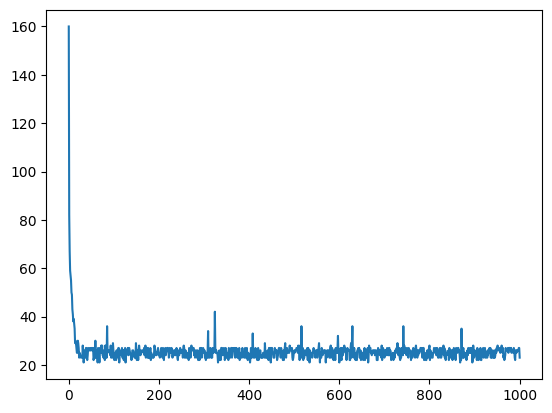

In [124]:
plt.plot(range(max_epochs+1), errors_epoch)

# Polynomial regression task

In this exercies, we will reuse the coordinate X1 to create a regression problem. The output Y (the "oracle" target function) is a cubic function aX^3 + bX^2 + cX + d with values a = -1, b = 2, c = -3, d = 4. Moreover, we sum some random noise with a gaussian distribution (mean zero, standard deviation 2.5).

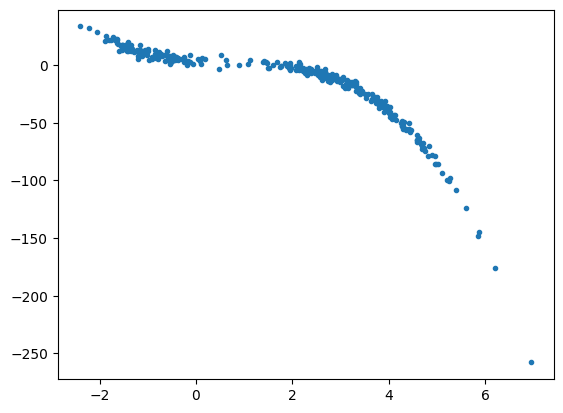

In [125]:
## draw the points and add noise to make the problem more realistic
# generate (oracle) quadratic target function
y = -X[:, 1]**3 + 2 * X[:, 1]**2 - 3 * X[:, 1] + 4 + np.random.normal(loc = 0, scale = 2.5, size=X.shape[0])

# plot data
plt.plot(X[:, 1], y, '.')

## Create data matrix
Suppose that your hypohtesis is a quadratic function, generate the data matrix accordingly (remember the X0) and save it into the variable X_reg.

In [126]:
# create (quadratic) data matrix
X0 = np.ones(N * 3)
# X_reg = np.stack((X0, X[:, 1], X[:, 1]**2), axis=1)

# create (quadratic) data matrix
X_reg = np.stack((X0, X[:, 1], X[:, 1]**2, X[:, 1]**3, X[:, 1]**4), axis=1)

## Find the optimal vector of parameters
In this case, we will try to find the optimal w using the closed form.

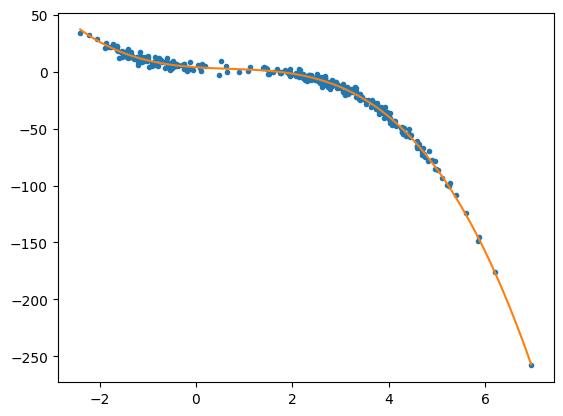

In [127]:
# find closed form solution
# w = (X^T  X)^-1 (X^T y)

w = np.dot(np.linalg.inv(np.dot(np.transpose(X_reg), X_reg)), np.dot(np.transpose(X_reg), y))

# plot points
plt.plot(X[:, 1], y, '.')

# generate grid of points
x_grid = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)

# plot line
# plt.plot(x_grid, w[0] + x_grid * w[1] + x_grid**2 * w[2])
plt.plot(x_grid, w[0] + x_grid * w[1] + x_grid**2 * w[2] + x_grid**3 * w[3] + x_grid**4 * w[4])

In [128]:
w

array([ 3.74377104e+00, -2.92277184e+00,  2.09300904e+00, -1.01832462e+00,
        6.00212066e-04])

## Check the curvature of the solution

Why does this solution look like a line? Try to plot the parabola and think about the reasons of this shape.

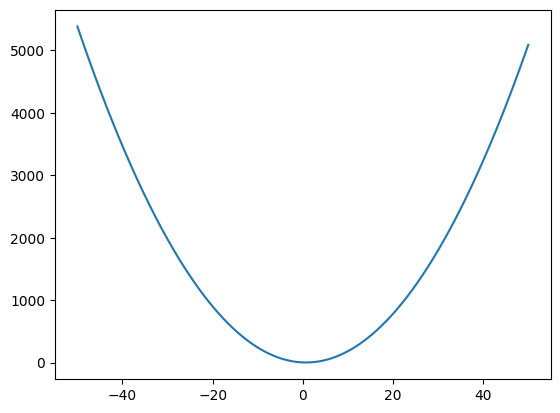

In [129]:
x_g = np.linspace(-50, 50, 100)
plt.plot(x_g, w[0] + x_g * w[1] + x_g**2 * w[2])

#plt.plot(x_g, w[0] + x_g * w[1] + x_g**2 * w[2] + x_g**3 * w[3] + x_g**4 * w[4])